In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


Returns

In [11]:
stocks_list = ['QQQ', 'VTI', 'AMD', 'KNSL', 'AXON', 'NVDA', 'MELI']

In [12]:
stocks = yf.download(stocks_list, start='2018-01-01', end='2023-01-01')['Adj Close']


[*********************100%***********************]  7 of 7 completed


In [13]:
stocks.head()

,AMD,AXON,KNSL,MELI,NVDA,QQQ,VTI
Date,,,,,,,
2018-01-02,10.98,26.549999,42.764500,322.579987,49.326286,152.886795,126.461716
2018-01-03,11.55,26.750000,42.301914,329.279999,52.572643,154.372345,127.193672
2018-01-04,12.12,26.830000,42.823547,325.880005,52.849777,154.642441,127.678574
2018-01-05,11.88,26.850000,44.250671,330.869995,53.297642,156.195496,128.428802
2018-01-08,12.28,26.770000,44.477051,340.790009,54.930706,156.803253,128.721588


In [14]:
stocks.tail()

,AMD,AXON,KNSL,MELI,NVDA,QQQ,VTI
Date,,,,,,,
2022-12-23,64.519997,168.979996,273.678894,878.320007,152.034180,266.946716,190.652878
2022-12-27,63.270000,166.250000,272.449463,854.299988,141.186020,263.172577,189.856079
2022-12-28,62.570000,165.100006,261.334381,839.570007,140.336166,259.697968,187.465714
2022-12-29,64.820000,165.580002,264.263092,866.280029,146.005203,266.028168,190.911835
2022-12-30,64.769997,165.929993,261.404327,846.239990,146.115189,265.868408,190.423798


In [15]:
returns = stocks.pct_change().dropna()
returns.head()

,AMD,AXON,KNSL,MELI,NVDA,QQQ,VTI
Date,,,,,,,
2018-01-03,0.051913,0.007533,-0.010817,0.020770,0.065814,0.009717,0.005788
2018-01-04,0.049351,0.002991,0.012331,-0.010326,0.005271,0.001750,0.003812
2018-01-05,-0.019802,0.000745,0.033326,0.015312,0.008474,0.010043,0.005876
2018-01-08,0.033670,-0.002980,0.005116,0.029982,0.030640,0.003891,0.002280
2018-01-09,-0.037459,0.001868,-0.023235,-0.009214,-0.000270,0.000062,0.001848


In [16]:
returns.mean()

AMD     0.002048
AXON    0.002021
KNSL    0.001761
MELI    0.001408
NVDA    0.001401
QQQ     0.000576
VTI     0.000422
dtype: float64

In [17]:
returns.std()

AMD     0.035791
AXON    0.033908
KNSL    0.025309
MELI    0.035929
NVDA    0.032688
QQQ     0.016494
VTI     0.013868
dtype: float64

<AxesSubplot:xlabel='Date'>

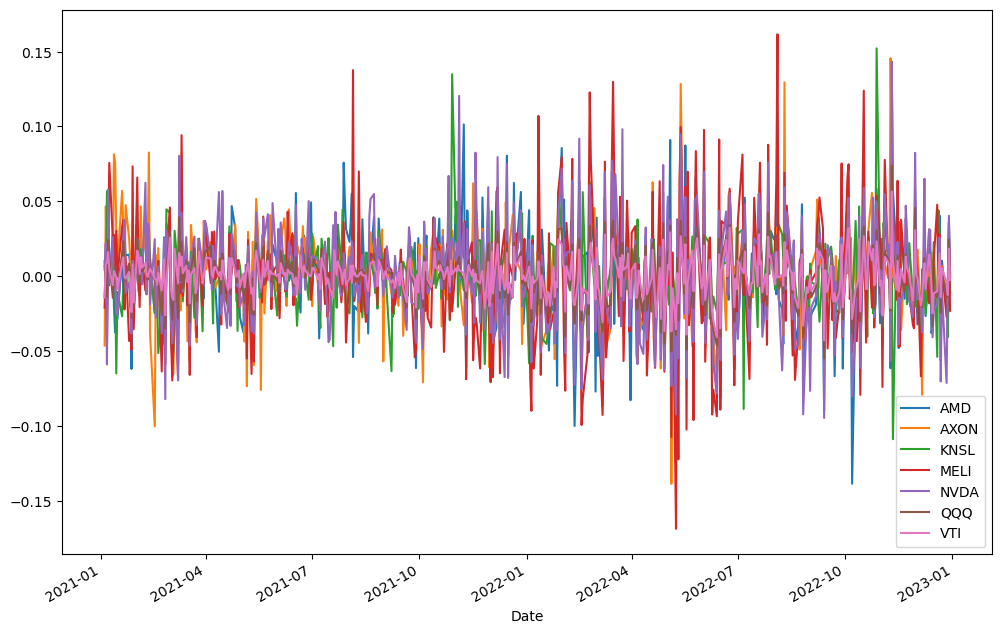

In [19]:
# plot the returns from 2021 to 2023    
returns['2021':].plot(figsize=(12,8))

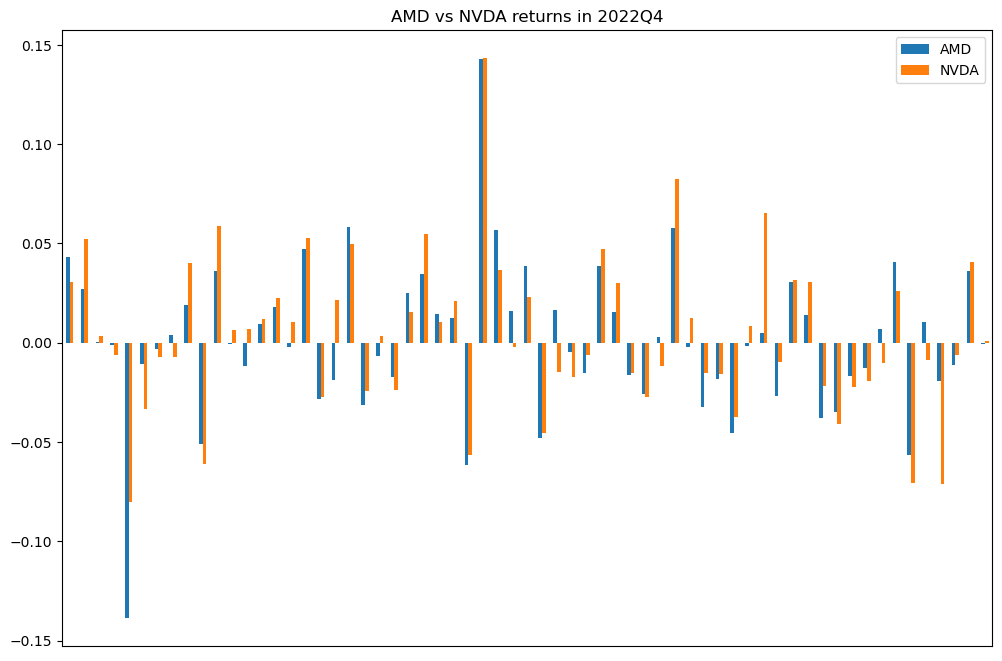

In [36]:
returns['2022-10':][['AMD', 'NVDA']].plot.bar(figsize=(12,8))
plt.title('AMD vs NVDA returns in 2022Q4')
# hide x label and x ticks
plt.xlabel('')
plt.xticks([])
plt.show()

In [40]:
compound_returns = (((returns + 1).prod() - 1)*100).round(2).to_frame() # this is the compound return
compound_returns.columns = ['Compound Returns']
compound_returns


,Compound Returns
AMD,489.89
AXON,524.97
KNSL,511.26
MELI,162.33
NVDA,196.22
QQQ,73.90
VTI,50.58


In [41]:
# annualized returns
annualized_returns = (((returns + 1).prod()**(1/len(returns)) - 1)*100).round(2).to_frame()
annualized_returns.columns = ['Annualized Returns']
annualized_returns

,Annualized Returns
AMD,0.14
AXON,0.15
KNSL,0.14
MELI,0.08
NVDA,0.09
QQQ,0.04
VTI,0.03


In [42]:
(1 + returns)**252 - 1


,AMD,AXON,KNSL,MELI,NVDA,QQQ,VTI
Date,,,,,,,
2018-01-03,345840.166028,5.627304,-0.935478,176.761971,9.456081e+06,10.436160,3.281756
2018-01-04,187066.064407,1.122340,20.943211,-0.926873,2.761869e+00,0.553521,1.608760
2018-01-05,-0.993527,0.206573,3869.620026,45.038065,7.385670e+00,11.406008,3.377151
2018-01-08,4208.610929,-0.528557,2.617942,1709.117819,2.008145e+03,1.660810,0.775076
2018-01-09,-0.999934,0.600362,-0.997327,-0.902964,-6.585197e-02,0.015643,0.592318
...,...,...,...,...,...,...,...
2022-12-23,12.343977,4.673785,-0.911726,3.288636,-8.885907e-01,0.761427,2.999243
2022-12-27,-0.992774,-0.983502,-0.678448,-0.999077,-1.000000e+00,-0.972353,-0.651945
2022-12-28,-0.939408,-0.826088,-0.999972,-0.987511,-7.816093e-01,-0.964890,-0.958948


In [43]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

AMD     0.123984
AXON    0.117460
KNSL    0.087673
MELI    0.124463
NVDA    0.113235
QQQ     0.057137
VTI     0.048041
dtype: float64

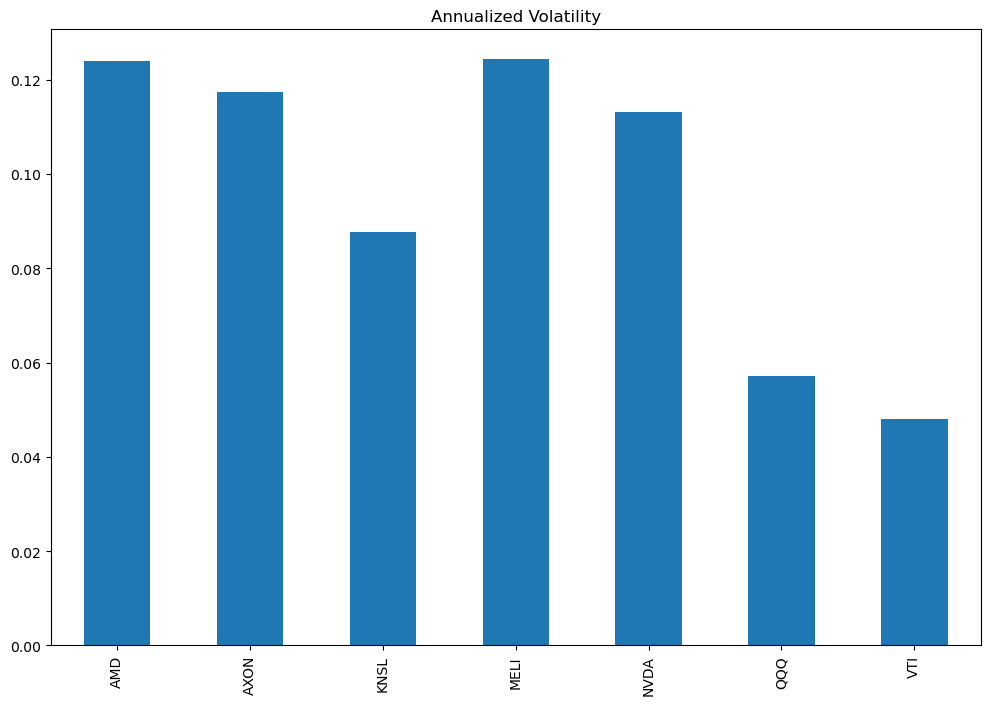

In [45]:
# plot the annualized vol
annualized_vol.plot.bar(figsize=(12,8))
plt.title('Annualized Volatility')
plt.show()


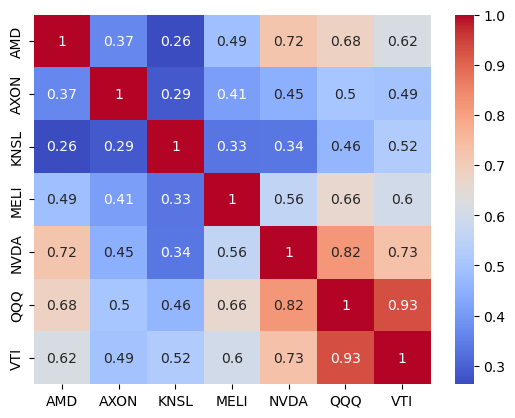

In [46]:
# plot a correlation between the stocks and the market volatility
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()
